<a href="https://colab.research.google.com/github/harrynguyen14/User_Behavior/blob/main/User_Behavior_Mobie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !cd /content/drive/MyDrive/User_Behavior

In [ ]:
# !unzip archive.zip

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/User_Behavior/user_behavior_dataset.csv')

User Behavior

1: Người dùng nhẹ (Low Usage) – Chỉ sử dụng thiết bị cho các tác vụ cơ bản (gọi, nhắn tin).

2: Người dùng trung bình (Moderate Usage) – Sử dụng thiết bị để duyệt web, mạng xã hội, và xem video ngắn.

3: Người dùng cao (Heavy Usage) – Thường xuyên sử dụng các ứng dụng nặng như chơi game, xem video dài.

4: Người dùng chuyên sâu (Power Users) – Phụ thuộc nhiều vào thiết bị cho cả công việc và giải trí.

5: Người dùng đa nhiệm (Multi-Device Users) – Sử dụng thiết bị đa dạng, có nhiều thiết bị liên kết.

In [ ]:
df.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


Evaluate

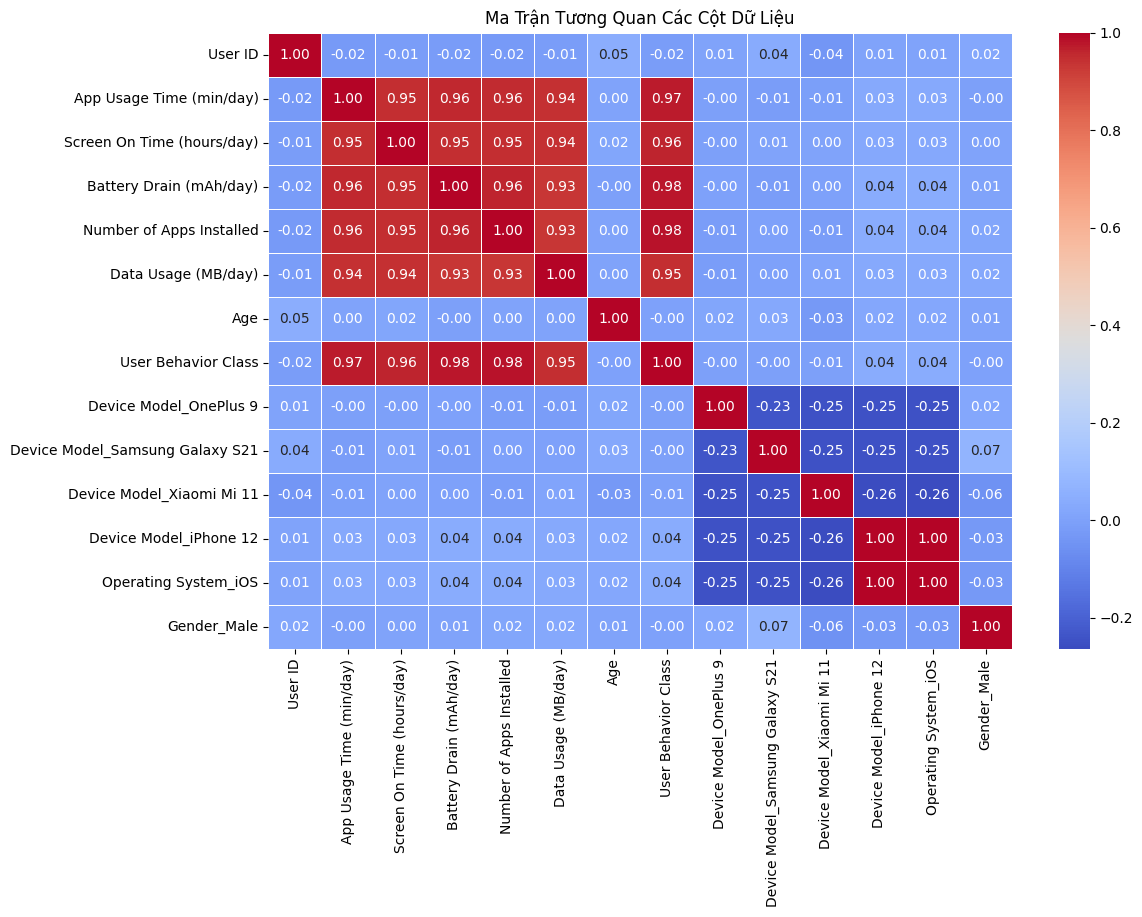

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Device Model', 'Operating System', 'Gender'], drop_first=True)
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma Trận Tương Quan Các Cột Dữ Liệu')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

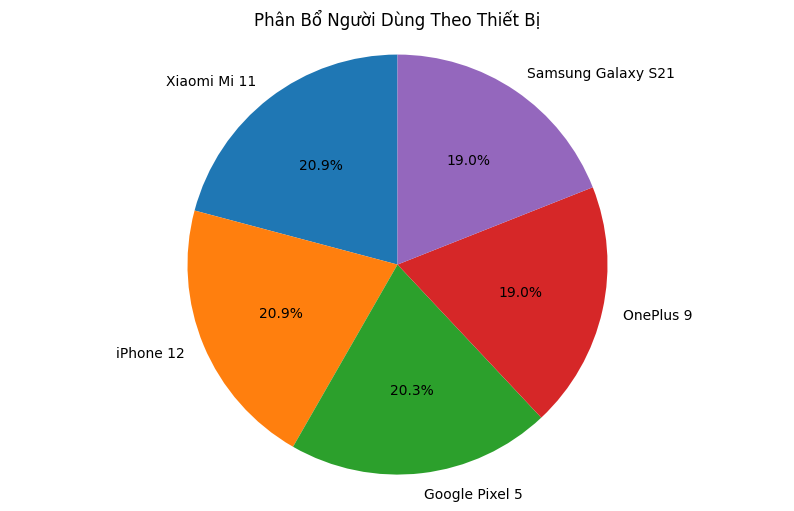

In [ ]:
device_model_count = df['Device Model'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(device_model_count, labels=device_model_count.index, autopct='%1.1f%%',startangle=90)
plt.title('Phân Bổ Người Dùng Theo Thiết Bị')
plt.axis('equal')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

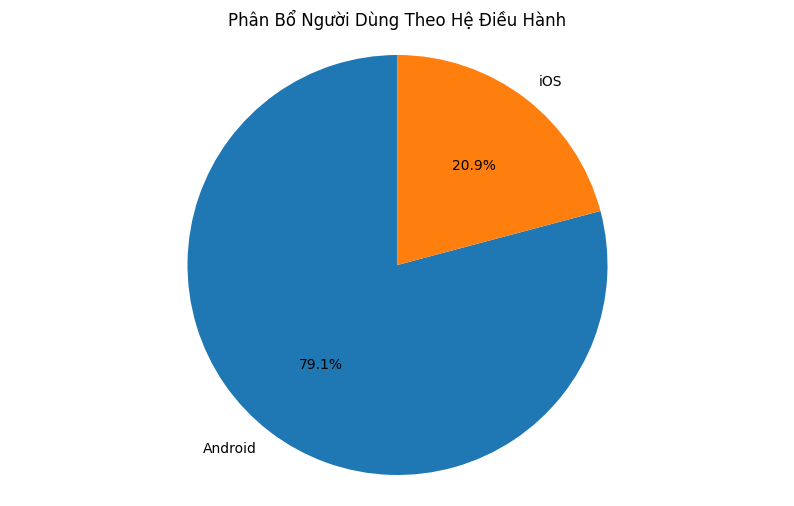

In [ ]:
os_count = df['Operating System'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(os_count, labels=os_count.index, autopct='%1.1f%%',startangle=90)
plt.title('Phân Bổ Người Dùng Theo Hệ Điều Hành')
plt.axis('equal')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

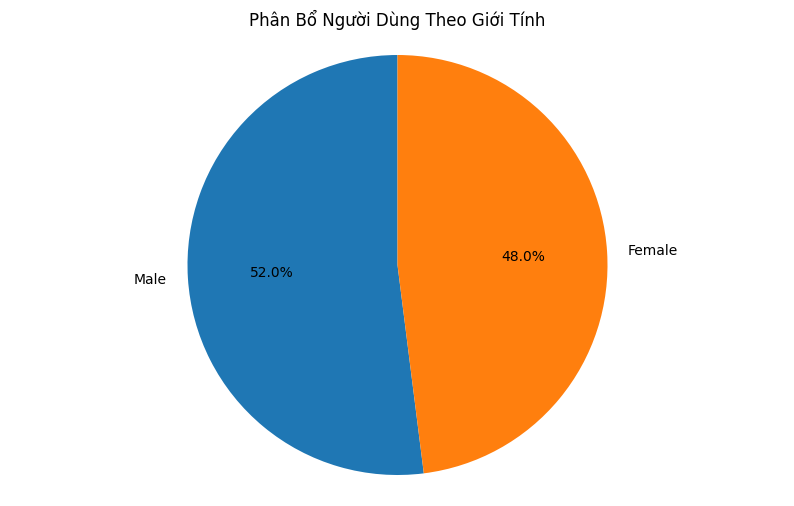

In [ ]:
gender_count = df['Gender'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%',startangle=90)
plt.title('Phân Bổ Người Dùng Theo Giới Tính')
plt.axis('equal')
plt.show

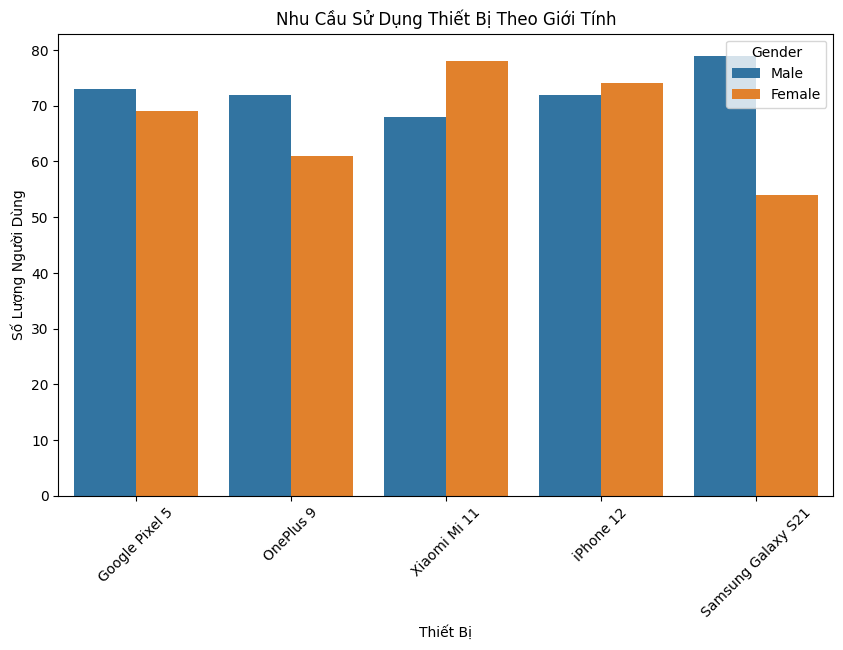

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Device Model', hue='Gender', data=df)

plt.title('Nhu Cầu Sử Dụng Thiết Bị Theo Giới Tính')
plt.xlabel('Thiết Bị')
plt.ylabel('Số Lượng Người Dùng')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_1 = df

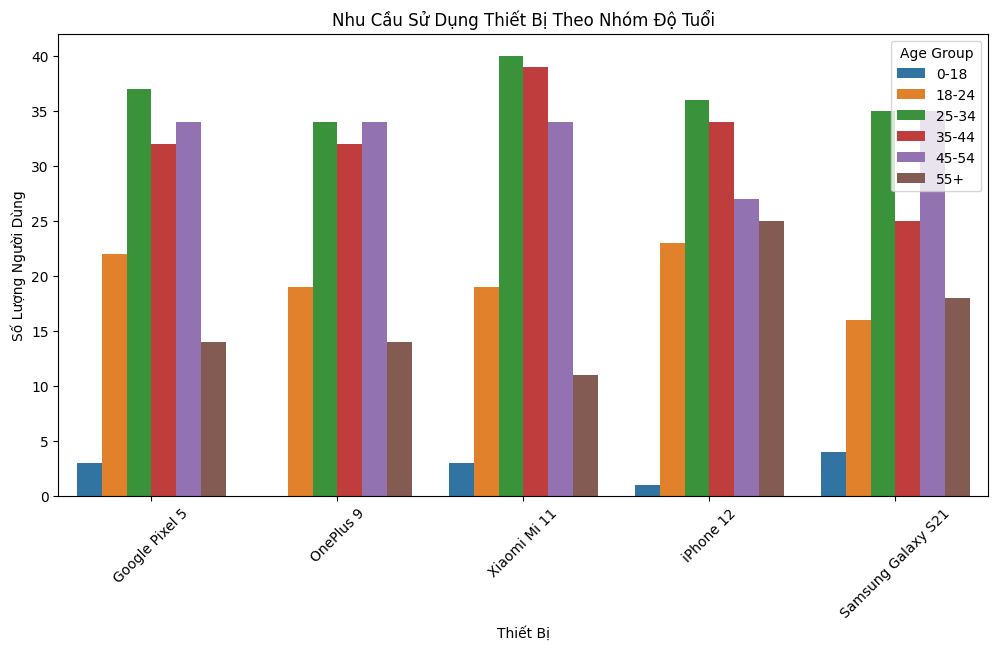

In [ ]:
bins = [0, 18, 24, 34, 44, 54, 64]
labels = ['0-18', '18-24', '25-34', '35-44', '45-54', '55+']
df_1['Age Group'] = pd.cut(df_1['Age'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.countplot(x='Device Model', hue='Age Group', data=df)
plt.title('Nhu Cầu Sử Dụng Thiết Bị Theo Nhóm Độ Tuổi')
plt.xlabel('Thiết Bị')
plt.ylabel('Số Lượng Người Dùng')
plt.xticks(rotation=45)
plt.show()

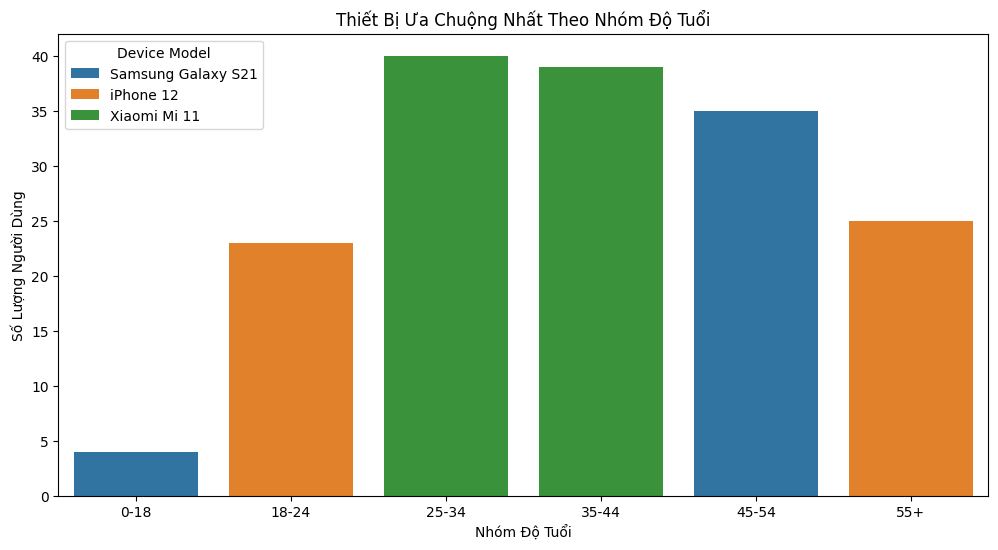

In [ ]:
device_popularity = df_1.groupby(['Age Group', 'Device Model']).size().reset_index(name='Count')

top_device = device_popularity.loc[device_popularity.groupby('Age Group')['Count'].idxmax()]

plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Count', hue='Device Model', data=top_device)
plt.title('Thiết Bị Ưa Chuộng Nhất Theo Nhóm Độ Tuổi')
plt.xlabel('Nhóm Độ Tuổi')
plt.ylabel('Số Lượng Người Dùng')
plt.show()

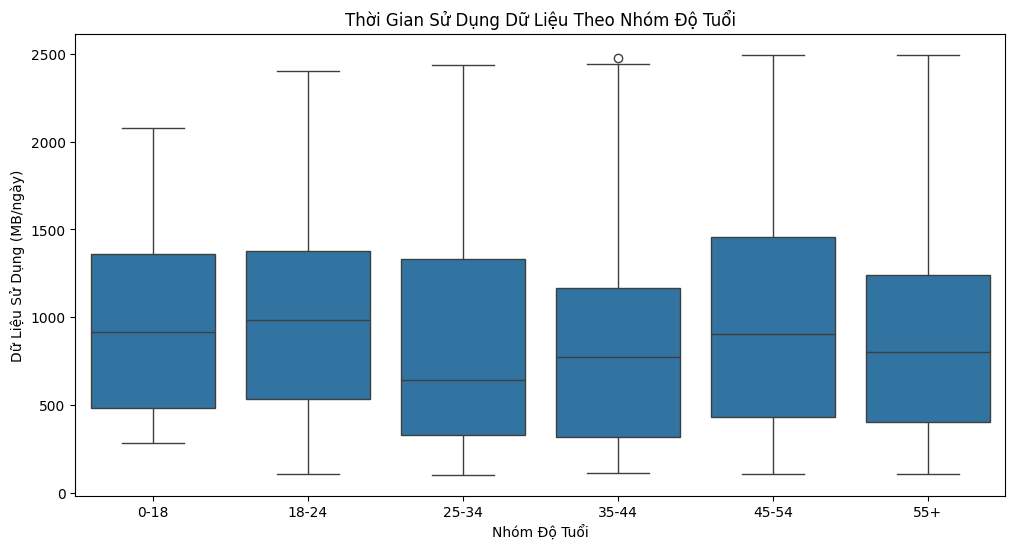

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Data Usage (MB/day)', data=df_1)
plt.title('Thời Gian Sử Dụng Dữ Liệu Theo Nhóm Độ Tuổi')
plt.xlabel('Nhóm Độ Tuổi')
plt.ylabel('Dữ Liệu Sử Dụng (MB/ngày)')
plt.show()

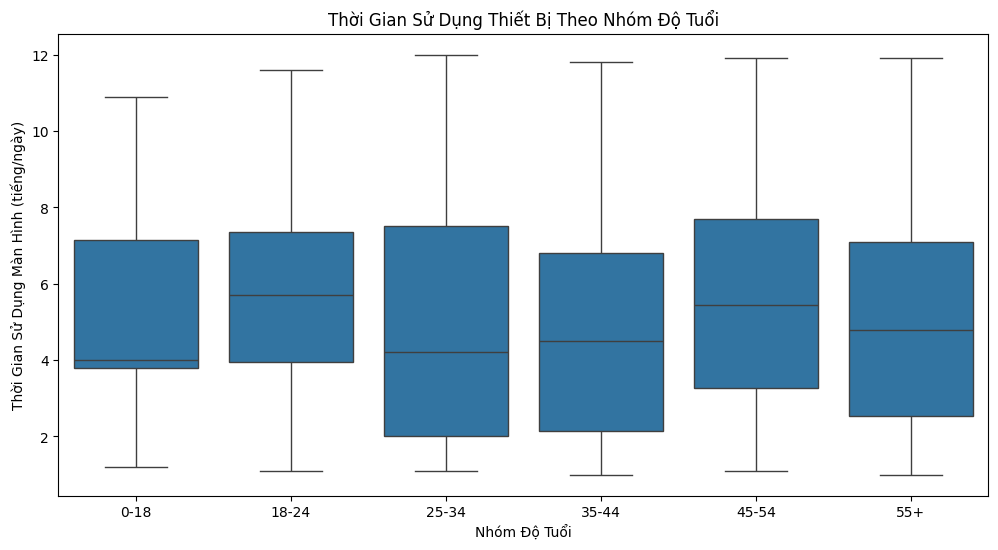

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Screen On Time (hours/day)', data=df_1)
plt.title('Thời Gian Sử Dụng Thiết Bị Theo Nhóm Độ Tuổi')
plt.xlabel('Nhóm Độ Tuổi')
plt.ylabel('Thời Gian Sử Dụng Màn Hình (tiếng/ngày)')
plt.show()

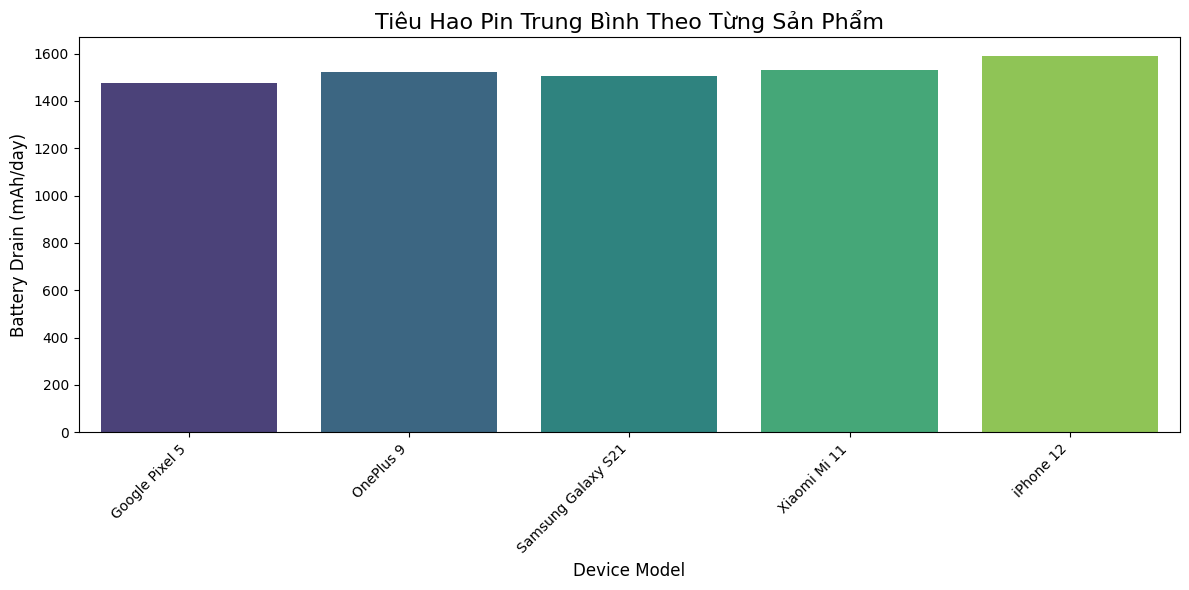

In [ ]:
battery_data = df[['Device Model', 'Battery Drain (mAh/day)']]
battery_avg = battery_data.groupby('Device Model').mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=battery_avg, x='Device Model', y='Battery Drain (mAh/day)', palette='viridis')
plt.title('Tiêu Hao Pin Trung Bình Theo Từng Sản Phẩm', fontsize=16)
plt.xlabel('Device Model', fontsize=12)
plt.ylabel('Battery Drain (mAh/day)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[['App Usage Time (min/day)', 'Screen On Time (hours/day)',
        'Battery Drain (mAh/day)', 'Data Usage (MB/day)',
        'Number of Apps Installed', 'Age', 'Gender']]
y = df['User Behavior Class']

In [ ]:
X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y1_pred = clf.predict(X_test)

In [ ]:
reg = LogisticRegression(random_state=42)
reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y2_pred = reg.predict(X_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y1_pred))
print(classification_report(y_test, y2_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

              precision    recall  f1-score   support

           1       0.95      0.74      0.83        27
           2       0.53      0.62      0.57        29
           3       0.53      0.53      0.53        34
           4       0.53      0.59      0.56        27
           5       0.71      0.65      0.68        23

    accuracy                           0.62       140
   macro avg       0.65      0.63      0.64       140
weighted avg       0.64      0.62      0.63       140


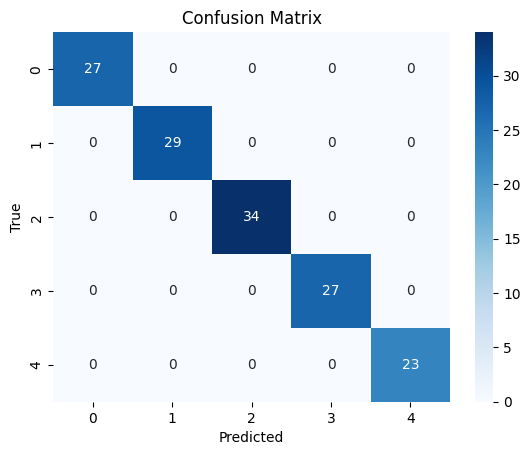

In [ ]:
conf_matrix = confusion_matrix(y_test, y1_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

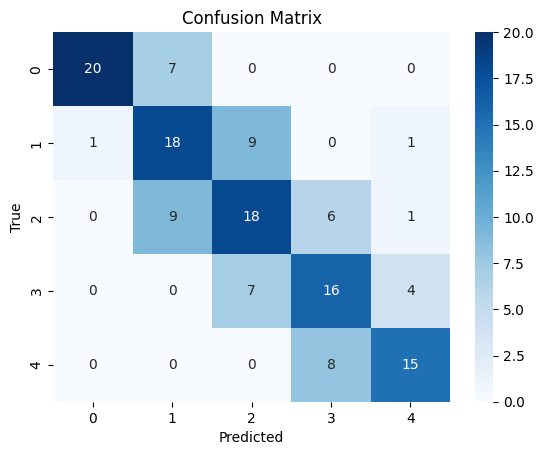

In [ ]:
conf_matrix = confusion_matrix(y_test, y2_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Predict

In [ ]:
new_user = [[120, 4, 2500, 500, 50, 25, 0]]

predicted_class = clf.predict(new_user)
print("Dự đoán User Behavior Class:", predicted_class[0])

Dự đoán User Behavior Class: 3
